# Boston Housing Prices:Linear Regression

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn import datasets #boston house prices data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error #mse #performance of the model

# Step 1: Loading the dataset

In [4]:
ab_boston = pd.read_csv("Boston_Housing_Dataset.csv")

ab_boston.head().T

,0,1,2,3,4
Unnamed: 0,0.00000,1.00000,2.00000,3.00000,4.00000
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000


# Step2: Exploratory Data 

In [5]:
ab_boston.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

In [6]:
ab_boston.isnull()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
ab_boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# plot a histogram to show the how the prices are distributes

In [8]:
plt.style.use('fivethirtyeight')

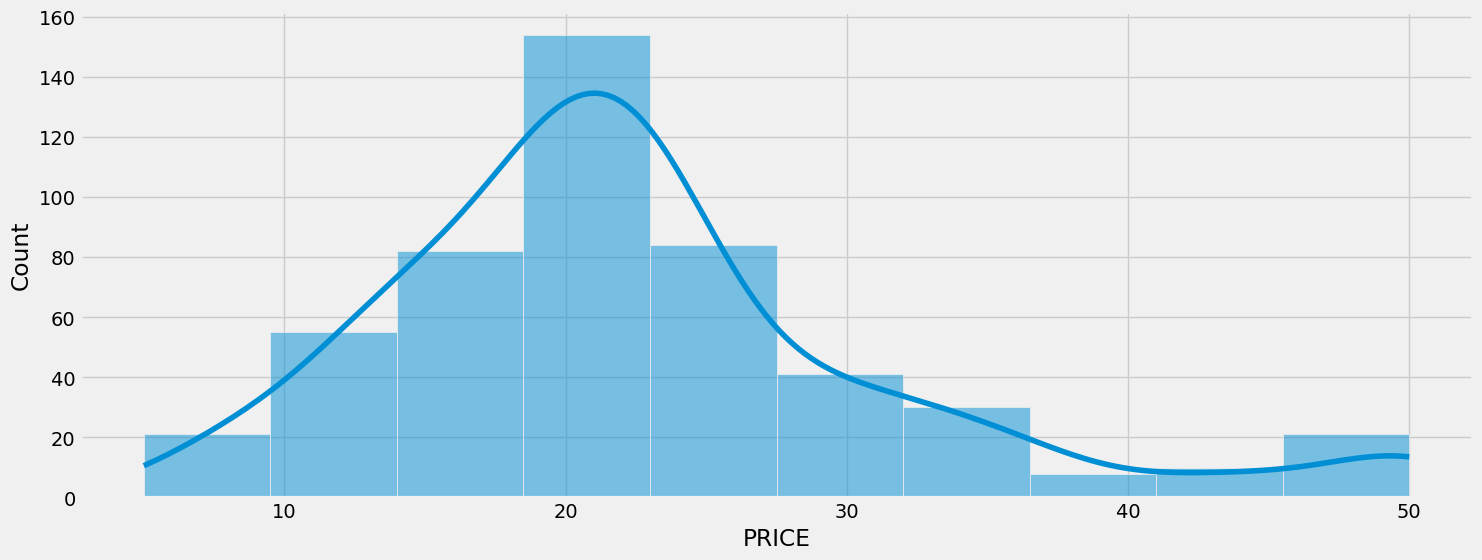

In [9]:
plt.subplots(figsize=(16,6))
sns.histplot(ab_boston['PRICE'],bins=10,kde=True)
plt.show()

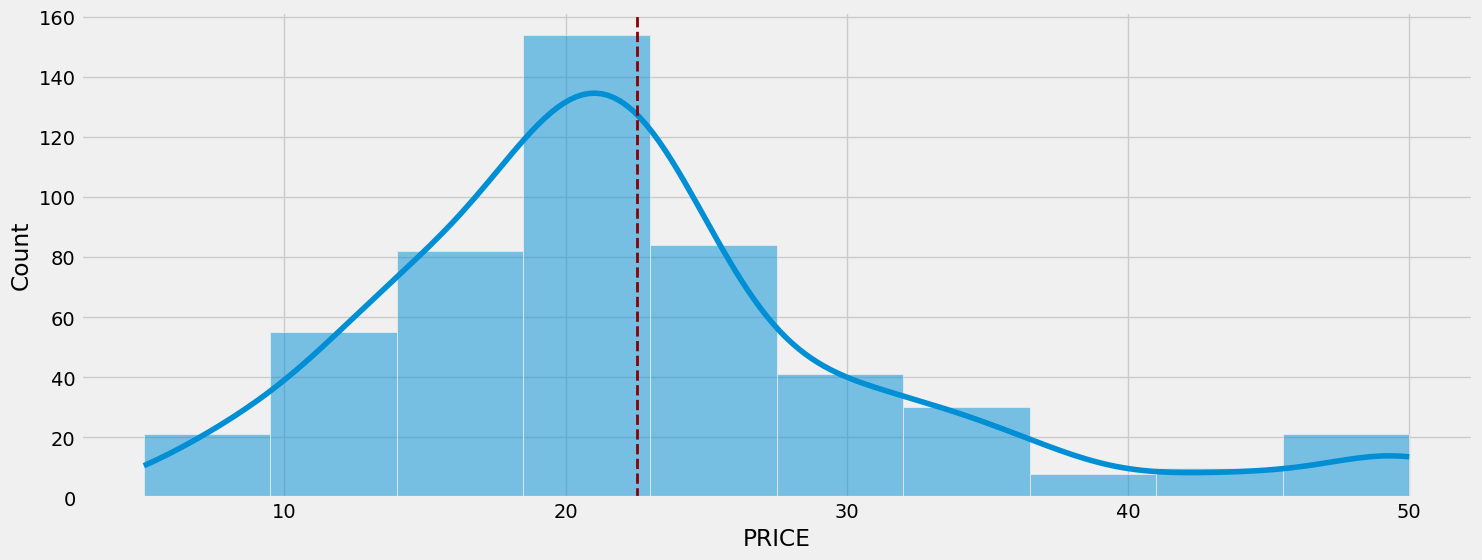

In [10]:
plt.subplots(figsize=(16,6))
sns.histplot(ab_boston['PRICE'],bins=10,kde=True)
#calculate average and median house prices
avg_prices=ab_boston['PRICE'].mean()
median_prices=ab_boston['PRICE'].median()
#add lines
plt.axvline(x=avg_prices,color='darkred',linestyle='dashed', linewidth=2,label='')
plt.show()

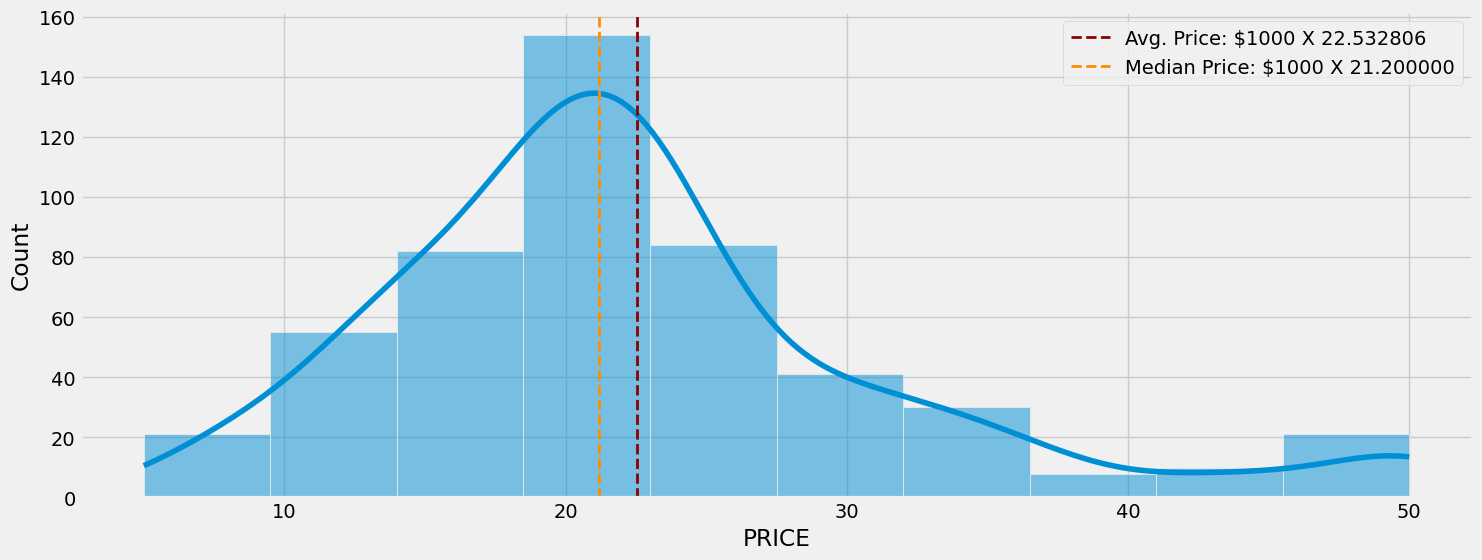

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ab_boston = pd.read_csv("Boston_Housing_Dataset.csv")

ab_boston.head().T
plt.subplots(figsize=(16,6))
sns.histplot(ab_boston['PRICE'], bins=10, kde=True)

###Calculate average & median house prices
avg_prices = ab_boston['PRICE'].mean()
median_prices = ab_boston['PRICE'].median()

###Add lines
plt.axvline(x=avg_prices, color='darkred', linestyle='dashed', linewidth=2, label=f'Avg. Price: $1000 X {avg_prices:2f}') #2f means two decimal places
plt.axvline(x=median_prices, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median Price: $1000 X {median_prices:2f}')

plt.legend()
plt.show()


# Step3:Feature Engineering

In [12]:
from sklearn.model_selection import train_test_split, validation_curve


*feature* independent/ predictor variables

*engineering*  transforming the variables

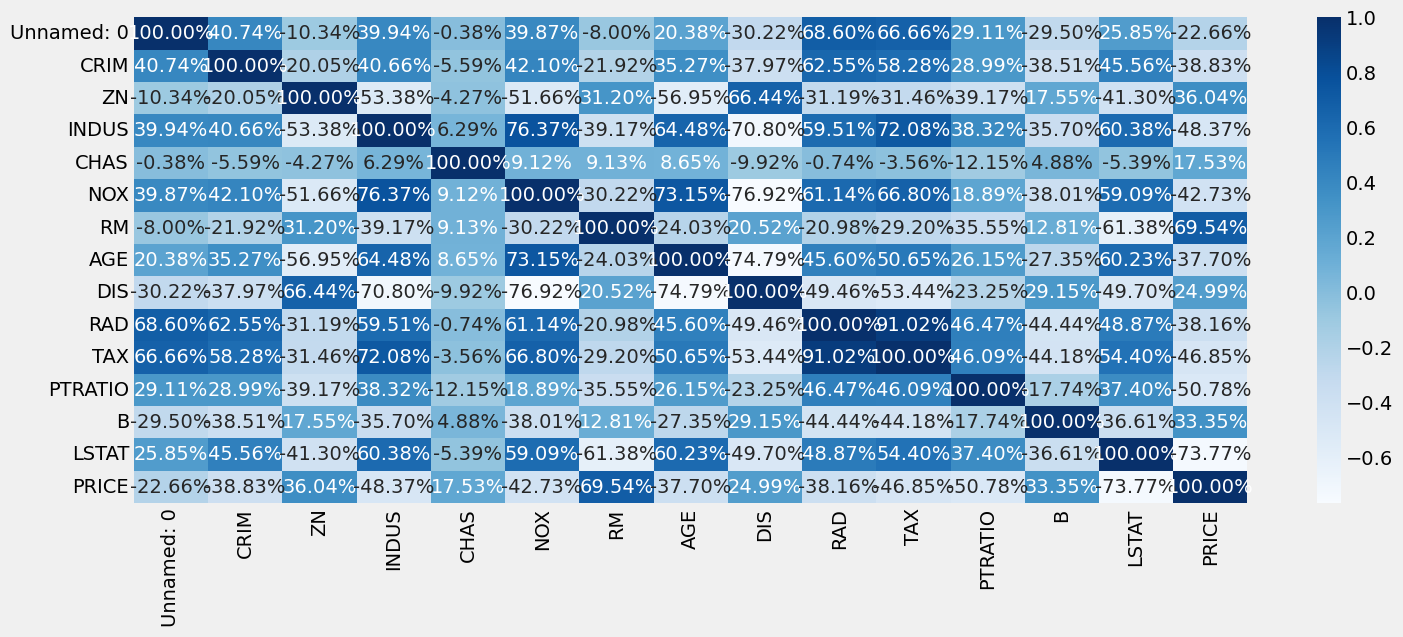

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(ab_boston.corr(),cmap='Blues',annot=True,fmt='.2%')
plt.show()

In [14]:
mask=np.triu(np.ones_like(ab_boston.corr(),dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

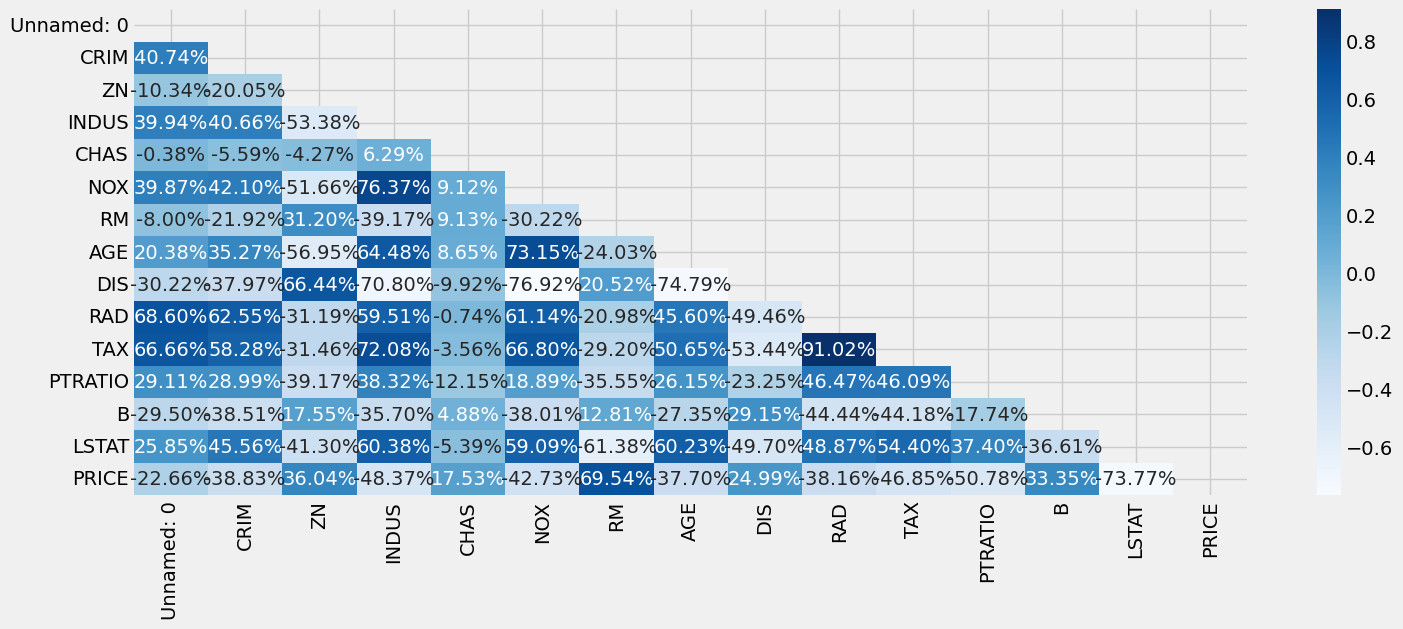

In [15]:
plt.figure(figsize=(16, 6))
mask = np.triu(ab_boston.corr())  # You need to create the mask using np.triu
sns.heatmap(ab_boston.corr(), mask=mask, cmap='Blues', annot=True, fmt='.2%')
plt.show()

# Causation indicates that one event is the result of occurrence of the other event




In [16]:
ab_boston.columns


Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [17]:
ab_boston.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
ab_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

# Simple Linear Regression Model
using variable - RM & target variable is 'PRICE'

Step 4: Building Machine Learning Model


In [19]:
X = ab_boston['RM']

In [20]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [21]:
ab_boston['RM'].min()

3.561

In [22]:
ab_boston['RM'].max()

8.78

In [23]:
X = np.array(X).reshape(-1,1)


In [24]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [25]:
y = ab_boston['PRICE']

In [26]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [27]:
X_train_1, X_validation_1, y_train_1, y_validation_1 = train_test_split(X,y,test_size=.20,random_state=15)

In [28]:
X_train_1.shape

(404, 1)

In [29]:
ab_boston.shape

(506, 14)

In [30]:
X_validation_1.shape


(102, 1)

In [31]:
404/506*100

79.84189723320159

In [32]:
102/506*100

20.158102766798418

# Training the model

In [33]:
linear_reg_model_1=LinearRegression()

In [34]:
linear_reg_model_1

LinearRegression()

In [35]:
linear_reg_model_1.fit(X_train_1,y_train_1)

LinearRegression()

# Validating the model

In [36]:
y_val_predicted = linear_reg_model_1.predict(X_validation_1)

In [37]:
X_validation_1

array([[6.59 ],
       [8.398],
       [5.572],
       [6.03 ],
       [6.715],
       [4.906],
       [5.404],
       [5.155],
       [6.606],
       [5.593],
       [6.335],
       [6.069],
       [6.014],
       [6.749],
       [5.878],
       [6.202],
       [5.277],
       [5.453],
       [6.059],
       [5.631],
       [7.47 ],
       [5.599],
       [6.14 ],
       [6.431],
       [5.949],
       [5.708],
       [6.453],
       [5.803],
       [6.326],
       [6.49 ],
       [6.145],
       [4.926],
       [6.144],
       [5.871],
       [6.326],
       [5.362],
       [6.009],
       [5.56 ],
       [6.471],
       [6.004],
       [8.259],
       [7.267],
       [6.411],
       [6.315],
       [6.98 ],
       [6.009],
       [5.879],
       [7.079],
       [6.516],
       [6.794],
       [7.249],
       [5.628],
       [5.701],
       [5.349],
       [5.965],
       [7.135],
       [5.531],
       [7.061],
       [6.162],
       [6.794],
       [5.427],
       [6.144],
       [

In [38]:
y_val_predicted

array([25.50805679, 41.90132286, 16.27777755, 20.4304965 , 26.64144078,
       10.23910763, 14.75450946, 12.49680855, 25.65312994, 16.46818606,
       23.19595344, 20.7841123 , 20.28542335, 26.94972122, 19.05230156,
       21.99003287, 13.60299132, 15.19879598, 20.69344158, 16.81273479,
       33.4870801 , 16.52258849, 21.42787441, 24.06639235, 19.69606367,
       17.51089933, 24.26586793, 18.37227117, 23.11434979, 24.60134959,
       21.47320977, 10.42044907, 21.4641427 , 18.98883206, 23.11434979,
       14.37369244, 20.24008799, 16.16897268, 24.42907522, 20.19475263,
       40.64099986, 31.64646449, 23.88505091, 23.014612  , 29.04421484,
       20.24008799, 19.06136863, 29.94185497, 24.83709346, 27.35773946,
       31.4832572 , 16.78553357, 17.44742983, 14.2558205 , 19.84113682,
       30.449611  , 15.9060276 , 29.77864767, 21.62734999, 27.35773946,
       14.96305211, 21.4641427 , 18.80749062, 20.75691109, 27.90176378,
       21.40067319, 19.04323449, 16.25057633, 21.67268535, 22.14

In [39]:
rmse =np.sqrt(mean_squared_error(y_validation_1, y_val_predicted))

In [40]:
rmse

5.991253410993819

In [41]:
print("The model performance for validaiton set:")
print("-----------------------------------")
print("Root Mean Square Error:{}".format(rmse))
print("-----------------------------------")


The model performance for validaiton set:
-----------------------------------
Root Mean Square Error:5.991253410993819
-----------------------------------


In [49]:
import os

### Let us do some plotting

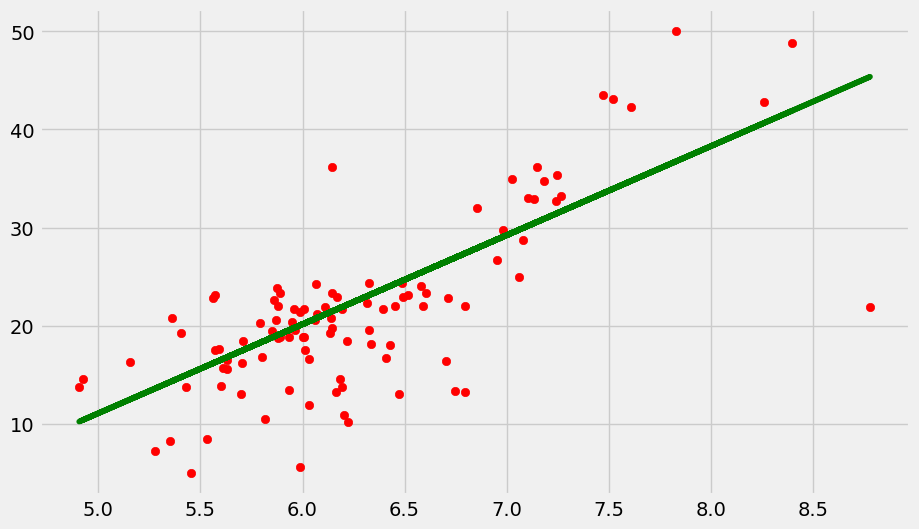

In [50]:
plt.subplots(figsize=(10,6))
plt.scatter(X_validation_1, y_validation_1, color="red")
plt.plot(X_validation_1, y_val_predicted, color='green')

plt.show()

In [51]:
print("The model performance for test set:")
print("-----------------------------------")
print("Root Mean Square Error:{}".format(rmse))
print("-----------------------------------")

### R^2: Coefficient
rsquare = round(linear_reg_model_1.score(X_validation_1, y_validation_1),6)
print('Coefficient of determination(R^2)for the model:')
print("-----------------------------------")
print("R^2:{}".format(rsquare*100))

The model performance for test set:
-----------------------------------
Root Mean Square Error:5.991253410993819
-----------------------------------
Coefficient of determination(R^2)for the model:
-----------------------------------
R^2:53.5827


In [52]:
from sklearn.metrics import r2_score

In [53]:
r_squared = r2_score(y_validation_1, y_val_predicted)

In [54]:
r_squared

0.5358267449799342

### Multiple Linear Regression

### including two variables - `RM & LSTAT`

In [56]:
X = ab_boston[['RM', 'LSTAT']]

In [57]:
y= ab_boston['PRICE']

In [58]:
X_train_2, X_validation_2, y_train_2, y_validation_2 = train_test_split(X,y, test_size=.20, random_state=45)

### Training the model

In [59]:
linear_reg_model_2 = LinearRegression()
linear_reg_model_2.fit(X_train_2, y_train_2)

LinearRegression()

### Validating the model

In [60]:
y_val_predicted_2 = linear_reg_model_2.predict(X_validation_2)

### Calculate RMSE & R^2

In [61]:
rmse = np.sqrt(mean_squared_error(y_validation_2, y_val_predicted_2))

In [62]:
r_squared = r2_score(y_validation_2, y_val_predicted_2)

In [63]:
print("The model performance for test set:")
print("-----------------------------------")
print("Root Mean Square Error:{}".format(rmse))
print("-----------------------------------")

### R^2: Coefficient
print('Coefficient of determination(R^2)for the model:')
print("-----------------------------------")
print("R^2:{}".format(r_squared))

The model performance for test set:
-----------------------------------
Root Mean Square Error:6.165806324221945
-----------------------------------
Coefficient of determination(R^2)for the model:
-----------------------------------
R^2:0.6482431532229032


In [64]:
n = len(X) #sample size
p=X.shape[1] #no. of variables
print(n)
print(p)

506
2


In [65]:
adj_r2_value = 1 - ((1-r_squared)*(n-1)/(n-p-1))

In [66]:
print("Adjusted R^2:{}".format(adj_r2_value))

Adjusted R^2:0.6468445176492368
